# Introduction
This notebook consists of a brief demonstration on how to implement linear and regularized regression models using sklearn. Focus lies on the developer's perspective, i.e. on implementing and fitting the model. For a more thorough theoretical description beyond my short explanations, see one of many awesome ressources on the topic, for example:
- Joshua D. Angrist, Jörn-Steffen Pischke: Mostly Harmless Econometrics
- Jeffrey M. Woolridge: Introductory Econometrics
- William H. Greene: Econometric Analysis
- Fahrmeir, Kneib, Lang and Marx: Regression

Source code of the imported functions can be found here:
- [LinearRegression](https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362).
- [Lasso](https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/coordinate_descent.py#L811)
- [PolynomialFeatures](https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/preprocessing/data.py#L1331)

## Regression Models
The main objective of regression models is to model the effect of a given set of explanatory variables $x_i$ on a variable y, which is called the dependent or response variable. We have different ways to to do this, depending on the kind of response variable and type of covariates. A common characteristic is that the relationship between y and x can be seperated in a deterministic part which we'd like to model and a stochastic error part $\epsilon$.

$$
\begin{align}
y = E(y|x) + \epsilon = f(x) + \epsilon 
\end{align}
$$

Our primary goal is to use the given data $y_i, x_{i1}, ..., x_{ik}$ to estimate the deterministic part and seperate it from the stochastic error component $\epsilon$.

Commonly used estimation techniques are the normal form equation for simple models, maximum likelihood estimation (MLE) and, in particular used in machine learning (ML), gradient descent (GD).

- **Normal Form Equation:** Closed form solution (gives the result directly) that minimizes the squared error.

$$
\begin{align}
\hat{\beta} = (X'X)^{-1}X'y
\end{align}
$$

- **Maximum Likelihood Estimation:** Relies on the maximization of the likelihood function (joint density of $y_i$) and answering the question: "What are the most likely parameters for this specification?".

$$
\begin{align}
L(\theta|y) = \prod_{i=1}^N L_i (\theta|y_i, x_i) = \prod_{i=1}^N f(y_i|x_i; \theta)  
\end{align}
$$

Usually, it is easier to use the natural logartitm, yielding the log-likelihood function. 

$$
\begin{align}
\underset{\theta}{max} \: log \: L(\theta) = \underset{\theta}{max} \sum_{i=1}^N log \: L_i(\theta) 
\end{align}
$$

The Maximum Likelihood-estimate is defined as the solution to $s(\beta) = 0$, where $s(\beta)$ denotes the score-function, which is the first order condition of the the log-likelihood function wrt $\beta$.

$$
\begin{align}
s(\beta) = \sum_{i=1}^n \frac{\partial \, log \, L_i(\beta)}{\partial \beta}
\end{align}
$$

The solution can be found by numerical optimization algorithms (e.g. [Fisher Scoring](https://en.wikipedia.org/wiki/Scoring_algorithm) as a form of [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method). A good ressource on this is Greene (2003). 

- **Gradient Descent:** Generic optimization algorithm with the idea to change parameters iteratively in order to minimize a specified cost function. It measures the local gradient of the error function wrt the parameters and takes a "step" towards the direction of descending gradient. After each step, the gradient is calculated again before taking another step. As the gradient is zero, a minimum is reached.  

In [1]:
# Time
from time import time
start_notebook = time()

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

## 1. Linear Regression
Linear regression is the most commonly used form of a regression model. The deterministic part is modeled as

$$
\begin{align}
E(y|x) &= x'\beta \\
&= \beta_0 + \beta_1 x_1 + ... + \beta_k x_k 
\end{align}
$$

- y is the observed dependent variable 
- x denotes covariates or independent variables
- $\beta$ is a parameter vector, which can be interpreted as partial derivatives of the dependent variable wrt the independent variable. Another explanation which is probably more intuitive is to perceive them as weights of respective x vector.  

Because we are modeling the relation between the conditional expectation and covariates the model yields the expected value of y (or arithmetic mean). There are other models which relate the covariates to the median (Median regression) or specific quantiles (Quantile regression, see below). Here, we observe x and want to model the relation to the mean of y.

A linear, additive relationship between y and x is assumed. As aforementioned, this relationship will never be perfect and, therefore, will have a stochastic error part. Hence, the model can be expressed as: 

$$
\begin{align}
y &= \beta_0 + \beta_1 x_{1} + ... + \beta_k x_k + \epsilon_i, \\
 &= x_i' \beta + \epsilon_i, \hspace{7mm} 
\end{align}
$$ 

Assumptions of the standard linear regression model are that the errors $\epsilon$ are independent and identically distributed (i.i.d assumption) with
$$E(\epsilon_i) = 0 \hspace{10mm} Var(\epsilon_i) = \sigma^2,$$

This assertion includes various important assumptions about the error at once. In particular, this includes the assumption of 
- **Strict exogeneity**, meaning that the error is uncorrelated with the regressors x $E(x' \epsilon) = 0 $),
- Assumption of **Spherical errors**, where $Var(\epsilon | X) = \sigma^2 I_n$. Otherwise, inference is invalid and estimator not efficient. Note that this can further be subdivided into two parts of problems to the error
 - We assume **homoscedastic errors**: $E(\epsilon_i^2 | X) = \sigma^2$ for all observations
 - and **no autocorrelation:** $E[\epsilon_i \epsilon_j | X] = 0$, for $i \neq j$.

In addition, it is sometimes assumed that errors are normally distributed to establish certain finite-sample properties.

$$ \epsilon_i \sim N(0,\sigma^2)$$

We will use the `LinearRegression()` fucntion of the `sklearn.linear_model` class. Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

--- 
### Linear Regression Example I: Life Expectancy

Predict life expectancy from BMI

Steps:
- Imports
- Load data
- Instantiate `LinearRegression()` class.
- Fit data
- Predict life expectancy using a theoretical BMI of 26.

In [2]:
# Additional imports
from sklearn.linear_model import LinearRegression

# Step 1: Load the data using pandas
data = pd.read_csv("data/data_bmi_and_life_expectancy.csv")
x = data["BMI"]
y = data["Life expectancy"]

print(x.head())
print(y.head())

0    20.62058
1    26.44657
2    24.59620
3    27.63048
4    22.25083
Name: BMI, dtype: float64
0    52.8
1    76.8
2    75.5
3    84.6
4    56.7
Name: Life expectancy, dtype: float64


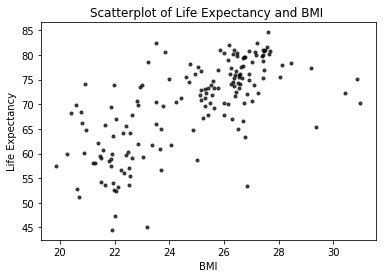

In [3]:
# Visualization
colors = (0,0,0)
area = np.pi*3

plt.scatter(x, y, s = area, c = colors, alpha = 0.7)
plt.title("Scatterplot of Life Expectancy and BMI ")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.show();

In [4]:
# Step 2: Build a linear regression model 
reg = LinearRegression()
reg = reg.fit(data[["BMI"]], data[["Life expectancy"]]) 

# Step 3: Predict life expectancy of a BMI of 26 
BMI = 26
life_exp = reg.predict(BMI).round(2)[0][0]
print("Predicted Life Expectancy:", life_exp)

# Coefficients
bhat0 = round(reg.intercept_[0],4)
bhat1 = round(reg.coef_[0][0],4)

print("Intercept: ", bhat0)
print("Coefficient: ", bhat1)

Predicted Life Expectancy: 72.71
Intercept:  7.2278
Coefficient:  2.5185


---
### Linear Regression II: Boston data

Use sklearn dataset API to load diabetes [data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). Note that a dictionary-like object is returned, consisting of:
- target (y): Regression target for each sample, dependent variable
- data (X): Data to learn, independent variables or feature matrix of variables.
- other information on the data

In [5]:
# Load data
boston_data = datasets.load_boston()
x = boston_data["data"]
y = boston_data["target"]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
# Linear regression for prediction
reg = LinearRegression()
reg.fit(x,y)

# Prediction
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

prediction = reg.predict(sample_house).round(2)
print("Prediction for sample house: ",prediction[0])

for i in range(len(reg.coef_)):
    print("b"+str(i+1)+":"+str(reg.coef_[i].round(4)))
    

Prediction for sample house:  23.68
b1:-0.1072
b2:0.0464
b3:0.0209
b4:2.6886
b5:-17.7958
b6:3.8048
b7:0.0008
b8:-1.4758
b9:0.3057
b10:-0.0123
b11:-0.9535
b12:0.0094
b13:-0.5255


--- 
### Linear Regression III: Diabetes
The following code shows how to ... For illustration purposes only one feature is considered (x3).

In [7]:
# Additional imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
diabetes = datasets.load_diabetes()

# Data exploration
X_full = diabetes["data"]
print("Shape of full dataset:", X_full.shape)
print("\n",X_full[:5,])

# Take out only third feature x3
x3 = diabetes.data[:, np.newaxis, 2]
print("\nShape of x3: ", x3.shape)

Shape of full dataset: (442, 10)

 [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]

Shape of x3:  (442, 1)


Intercept:  152.0 
Coefficient:  998.58
MSE:  4061.83
R2:  0.23


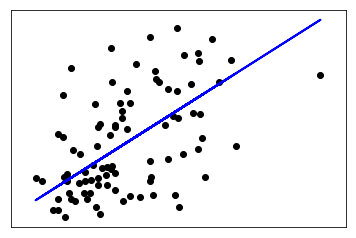

In [8]:
# Split data into training/testing data
x_train, x_test, y_train, y_test = train_test_split(x3, 
                                                    diabetes.target, 
                                                    test_size =0.2,
                                                    random_state=42)

# Instantiate regression object
reg = LinearRegression()

# Fit the model to object
reg.fit(x_train, y_train)

# Coefficients
print("Intercept: ", reg.intercept_.round(2) ,"\nCoefficient: ", reg.coef_[0].round(2) )

# Predictions
y_pred = reg.predict(x_test)

# MSE
print("MSE: ", mean_squared_error(y_test, y_pred).round(2))

# R-squared
print("R2: ", r2_score(y_test, y_pred).round(2))

# Calculate vectorized form of t-values

# Plots
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color ="blue", linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

---
### 2. Polynomial Regression
We will now assume a nonlinear relationship between the conditional mean of y and x, for example

$$ 
\begin{align}
E(y|x) = \beta_0 + \beta_1 x + \beta_2 x^2 + ... +  \epsilon  
\end{align}
$$

Therefore, we will add additional polynomials of x. This is called **polynomial regression**. Note that we can use this kind of regressions to fit nonlinear data with a linear model specification. 

In [9]:
# Import polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Data
data = pd.read_csv("data/data_poly_reg.csv")
x = data["Var_X"].values.reshape(-1,1)
y = data["Var_Y"].values

# Instantiate polyomial object
poly_feat = PolynomialFeatures(degree = 4)

# Fit polynomial object to x
x_poly = poly_feat.fit_transform(x)

# Polynomial regression
poly_reg = LinearRegression(fit_intercept = False)
poly_reg.fit(x_poly, y)

# Coefficients
print("Coefficients: ", poly_reg.coef_)

Coefficients:  [ 3.37563501 -6.28126025 -2.3787942   0.55307182  0.22699807]


**To do** 
- Show that unconstrained polynomial regression tends to overfit and therefore often suffers from poor generalizability. 
- Show and explain the bias-variance tradeoff
 - Compare and contrast linear regression and polynomial regression as two complete opposites.
- Add another polynomial regression using more complex data and add plots
- Regularized regression as a middle ground to balance bias and variance

---
## 3. Regularized Regression
We have seen two "extreme" cases of regression models. Whereas, linear regression fits a simple straight line to the data, polynomial regression can fit curves pretty well at the cost of generalizability.  

In general, these are two extreme forms of overfitting and underfitting. See also general considerations, which are usually discussed as [Bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

There are two main problems with these methods:
- Underfitting: Fitting a simple curve to the data is often not flexible enough and misses some relations. 
 - Example: Linear regression
 - High bias, low variance
- Overfitting: Very flexible methods are sensitive to fitting the noise in the data, hereby diluting the underlying signal that we are interested in.
 - Example: Polynomial regression
 - Low bias, high variance
 
A good way to reduce overfitting is to regularize the model, i.e. penalize complexity. This can be implemented by considering a penalized least squares (PLS) objective function 

$$
\begin{align}
\beta_{PLS} = arg \, \underset{\beta}{min} \,[(y-X \beta)'(y-X \beta) + \lambda \cdot pen(\beta)]
\end{align}
$$ 

In **Ridge Regression**, the resulting penalty is simply given by the sum of the squared coefficients: 

$$pen(\beta) = \sum_{j=0}^k \beta_j^2 = \beta' \beta$$

**Least absolute Shrinkage and Selection Operator (LASSO)** replaces the penalty of squared regression coefficients with absolute values

$$pen(\beta) = \sum_{j=0}^k |\beta_j| $$

leading to 

$$
\begin{align}
\hat{\beta}_{LASSO} = arg \, \underset{\beta}{min} \,(y-X \beta)'(y-X \beta) + \lambda \cdot \sum_{j=1}^k |\beta_k|
\end{align}
$$ 

Both models can be used to balance between fit to the data and regularized solutions by modifying the smoothing parameter $\lambda$. Ridge regression adds a quadratic penalty with large impact on big coefficients and small penalty for small coefficient values. LASSO penalties increase at a slower rate for large coefficient values, leading to the behavior that small coefficients will be more strongly drawn towards zero, while larger coefficients will be less affected. 

In [10]:
# Regularization
from sklearn.linear_model import Lasso, Ridge

# Assign the data to predictor and outcome variables
train_data = pd.read_csv("data/data_regularization.csv", header= None)
X = train_data.iloc[:, :6]
y = train_data.iloc[:, 6]

# Lasso Reg
lasso_reg = Lasso()
lasso_reg.fit(X,y)

reg_coef = lasso_reg.coef_
print("Coefficients:",reg_coef.round(4))

Coefficients: [ 0.      2.3579  2.0044 -0.0551 -3.9281  0.    ]


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
train_data = pd.read_csv("data/data_regularization.csv", header= None)

X = train_data.iloc[:,0:-1]
y = train_data.iloc[:,-1]

# show data
print(X.head())
print("\n", y.head())

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso Reg
lasso_reg = Lasso()
lasso_reg.fit(X_scaled,y )

reg_coef = lasso_reg.coef_
print("\nCoefficients:",reg_coef.round(4))

         0        1         2        3        4        5
0  1.25664  2.04978  -6.23640  4.71926 -4.26931  0.20590
1 -3.89012 -0.37511   6.14979  4.94585 -3.57844  0.00640
2  5.09784  0.98120  -0.29939  5.85805  0.28297 -0.20626
3  0.39034 -3.06861  -5.63488  6.43941  0.39256 -0.07084
4  5.84727 -0.15922  11.41246  7.52165  1.69886  0.29022

 0    12.31798
1    23.67628
2    -1.53459
3   -24.68670
4    17.54122
Name: 6, dtype: float64

Coefficients: [  0.       3.9075   9.0258  -0.     -11.783    0.4534]


In [12]:
train_data = pd.read_csv("data/data_regularization.csv", header= None)

X = train_data.iloc[:,0:-1]
y = train_data.iloc[:, -1]

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso Reg
ridge_reg = Ridge()
ridge_reg.fit(X_scaled,y )

reg_coef = ridge_reg.coef_
print("Coefficients:", reg_coef.round(4))

Coefficients: [ -0.0297   5.0902   9.7168  -0.6581 -12.411    1.6931]


**to do**
- Add visualizations, a more complex dataset and compare to linear model. Compare different values of $\lambda$.
- Add Inference
- [Lasso and Elastic Net](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py)
- [Lasso model selection: Cross-validation / AIC / BIC](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)
- [Lasso path using LARS](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)
- [Cross-Validation](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py)


---
## 4. Quantile Regression 
Quantile regression (QR) has become a widely used statistical method to analyse the relationship between dependent and independent variables. Whereas ordinary least squares (OLS) relates covariates to the conditional expectation function, QR links to the conditional quantile function:
$$
\begin{align}
Q_{\tau} (y|x) = x' \beta_{\tau}
\end{align}
$$
meaning that given x, what is the respective $\tau$-quantile of y, giving additional insights about the distribution of y. It is often used to examine the effect of x on the tails of the distribution of y. For example, to answer questions like "What is the effect of x on low income earners in the first decile?" (e.g. the first of ten quantiles seperating the observations in ten parts). 

For more information and applications in R, see my repository on [Quantile Regression](https://github.com/tm1611/Quantile-Regression-Project).

In [13]:
end_notebook = time()
time_notebook = end_notebook - start_notebook
print("Total running time of the script:", round(time_notebook,2))

Total running time of the script: 2.81
